# K-Means Clustering

K-Means Clustering is a popular unsupervised machine learning algorithm used to partition a dataset into **K** distinct, non-overlapping groups or clusters based on similarity. Each cluster is defined by a centroid (the mean of all points in the cluster), and the algorithm works by minimizing the variance within each cluster while maximizing the separation between clusters. 

---
## **What is K-Means Clustering?**
K-Means is an iterative algorithm that partitions a dataset into \(k\) distinct, non-overlapping clusters by minimizing the variance within each cluster. It assigns each data point to the cluster with the nearest centroid (mean) and updates centroids based on the assigned points.

### **Why Use K-Means?**
- **Simplicity**: Easy to understand and implement.
- **Scalability**: Efficient for large datasets with moderate dimensions.
- **Versatility**: Applicable to various domains (e.g., customer segmentation, image compression).
- **Unsupervised**: Requires no labeled data.

## **How It Works**
1. **Initialization**: Choose \(k\) initial centroids (randomly or via methods like K-Means++).
2. **Assignment**: Assign each point to the nearest centroid based on distance metric (typically Euclidean).
3. **Update**: Recalculate each centroid as the mean of all points assigned to its cluster.
4. **Iteration**: Repeat until centroids stabilize or a maximum number of iterations is reached.

![clustering](../images/Clusters3D.gif)

## **2. Key Concepts and Methods**

### **a. Core Mechanics**

- **Centroid**: The central point of a cluster, calculated as the mean of all data points assigned to it.
- **Cluster Assignment**: Each data point is assigned to the cluster whose centroid is closest.
- **Objective**: Minimize the **Within-Cluster Sum of Squares (WCSS)**, which is the sum of squared distances between each point and its centroid.
    `WCSS = Σ (xᵢ - μⱼ)²`  
    Where:  
    - `xᵢ` = Data point  
    - `μⱼ` = Cluster centroid

- **Distance**: Euclidean distance is default: \( \|x - \mu\| = \sqrt{\sum (x_j - \mu_j)^2} \).
- **Convergence**: Stops when centroids no longer move significantly or max iterations are reached.

### **b. Hyperparameters**
`kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)`
- `n_clusters` (\(k\)): Number of clusters (must be specified).
- `init`: Initialization method ("random" or "k-means++" for better starting points).
- `max_iter`: Maximum iterations for convergence.
- `n_init`: Number of times to run with different initial centroids (picks best).

---

## Advantages and Limitations

### Advantages

- **Simplicity**: Easy to understand and implement.
- **Efficiency**: Computationally efficient, with a time complexity of O(N*K*I), where N is the number of points, K is the number of clusters, and I is the number of iterations.
- **Versatility**: Works with various data types and can adapt to different distance metrics.

### Limitations

- **Choosing K**: Requires specifying the number of clusters beforehand, which isn’t always intuitive.
- **Sensitivity to Initialization**: Random starting centroids can lead to suboptimal results.
- **Assumes Spherical Clusters**: Performs poorly with clusters of irregular shapes or varying densities.
- **Outlier Sensitivity**: Outliers can disproportionately affect centroid positions.

---
## Choosing the Optimal Number of Clusters (K)

Selecting the right **K** is critical for effective clustering. Here are three common methods, all of which we’ll implement in Python:

1. **Elbow Method**: Plots WCSS against K to find a point where adding more clusters yields diminishing returns (the "elbow").
2. **Silhouette Score**: Measures how well-separated and cohesive clusters are, with higher scores indicating better clustering.
3. **Gap Statistic**: Compares WCSS of the data to that of random data (not implemented here due to complexity, but widely recognized).

---

## Applications of K-Means

K-Means is widely used across industries and domains. Examples include:

- **Customer Segmentation**: Grouping customers based on purchase history or demographics for targeted marketing.
- **Image Compression**: Reducing the number of colors in an image by clustering similar colors.
- **Document Clustering**: Organizing articles or texts into topics based on word usage.
- **Anomaly Detection**: Identifying outliers that don’t fit well into any cluster.

---

## Implementing K-Means in Python: A One-Stop Solution

We’ll use the **Iris dataset**, which contains 150 samples of iris flowers with four features (sepal length, sepal width, petal length, petal width) and three species. Although K-Means is unsupervised and doesn’t use labels during clustering, we’ll use the true labels afterward to evaluate performance.

### Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (150 samples, 4 features)
y = iris.target  # True labels (for evaluation)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- **Why Standardize?** K-Means relies on distance calculations, so scaling features to have a mean of 0 and variance of 1 ensures all features contribute equally.

### Step 2: Determine the Optimal Number of Clusters

Elbow Method

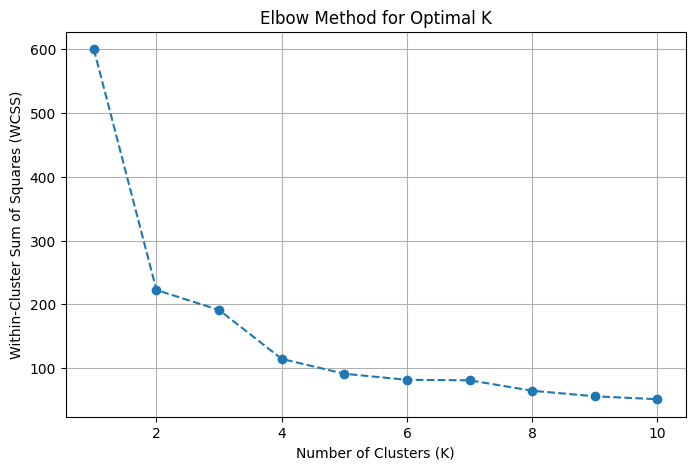

In [2]:
# Calculate WCSS for K ranging from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

- **Interpretation**: Look for an "elbow" where WCSS decreases more slowly. For the Iris dataset, K=3 often appears as a reasonable choice.

#### Silhouette Score

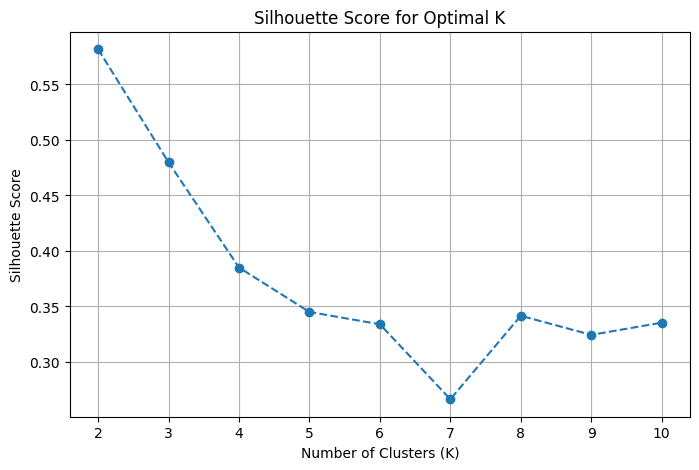

In [3]:
# Calculate Silhouette Score for K ranging from 2 to 10
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

- **Interpretation**: The highest score indicates the best K. For Iris, K=2 or K=3 typically scores well, with K=3 aligning with the known species count.

### Step 3: Train the K-Means Model

Based on the Elbow and Silhouette analysis, let’s use K=3:

In [4]:
# Initialize and fit K-Means with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

- **K-Means++**: Improves initialization by spreading out initial centroids, reducing the risk of poor clustering.
- **n_init=10**: Runs the algorithm 10 times with different initializations and selects the best result.

### Step 4: Visualize the Clusters

Since we can’t plot all four features, we’ll visualize the first two (sepal length and width):

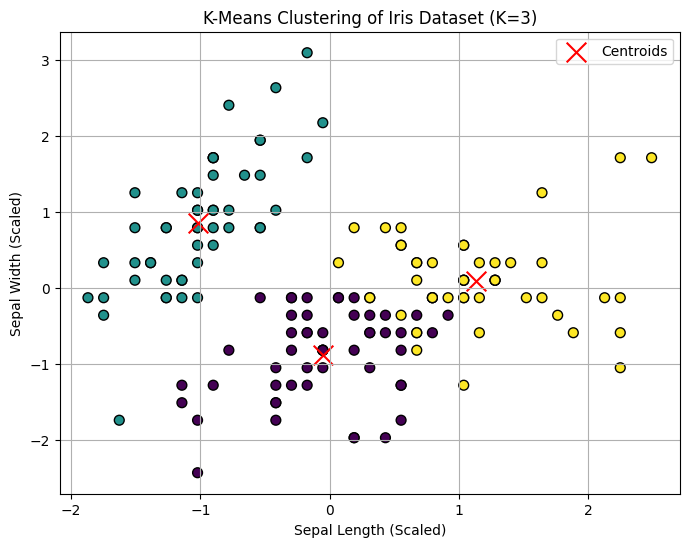

In [5]:
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.title('K-Means Clustering of Iris Dataset (K=3)')
plt.legend()
plt.grid(True)
plt.show()

- **What You See**: Points are colored by cluster, and red X’s mark the centroids.

### Step 5: Evaluate Clustering Performance

Since we have true labels, we can compare clusters to species using a confusion matrix:

In [6]:
# Confusion matrix to compare clusters with true labels
conf_matrix = confusion_matrix(y, labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


- **Output Example**:
  ```
  Confusion Matrix:
  [[50  0  0]
   [ 0 48  2]
   [ 0 14 36]]
  ```
- **Interpretation**: Rows are true species (0, 1, 2), and columns are clusters. Here, cluster 0 perfectly matches species 0, while species 1 and 2 have some overlap.

---

## **Tools and Methods Summary**
- **Modeling**: `sklearn.cluster.KMeans`.
- **Evaluation**: `sklearn.metrics.silhouette_score`, `.inertia_` (WCSS).
- **Visualization**: `matplotlib.pyplot.scatter()`, `seaborn.scatterplot()`.

In [7]:
# Predict cluster for new data
new_data = np.array([[0, 0], [5, 5]])
clusters = kmeans.predict(new_data)
print("New Data Clusters:", clusters)

ValueError: X has 2 features, but KMeans is expecting 4 features as input.

---

## **Conclusion**
K-Means Clustering is a straightforward, effective algorithm for unsupervised grouping, minimizing within-cluster variance to uncover patterns.

---

## Example with Synthetic Data

Let’s apply K-Means to a synthetic dataset for variety:

In [ ]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X_synth, y_synth = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Standardize
X_synth_scaled = scaler.fit_transform(X_synth)

# Fit K-Means
kmeans_synth = KMeans(n_clusters=4, random_state=42)
kmeans_synth.fit(X_synth_scaled)
labels_synth = kmeans_synth.labels_
centroids_synth = kmeans_synth.cluster_centers_

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_synth_scaled[:, 0], X_synth_scaled[:, 1], c=labels_synth, cmap='plasma', s=50)
plt.scatter(centroids_synth[:, 0], centroids_synth[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering of Synthetic Data (K=4)')
plt.legend()
plt.grid(True)
plt.show()

- **Result**: Clear separation of four clusters, demonstrating K-Means’ effectiveness on well-separated data.

---